In [1]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 3.8 MB 63.1 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 69.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cb37072579e81e6fa9e07077cfe638465fc7fbf2ac62b91f7421e75e36953bf1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [2]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.17.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [3]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 18.6 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=c47b3146cf8411a7abb648a8727c30abc58d5a6085ddb620fbcd53067b9b5ef9
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [4]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3940352/45929032 bytes (8.6%)7979008/45929032 bytes (17.4%)11575296/45929032 bytes (25.2%)14696448/45929032 bytes (32.0%)16908288/45929032 bytes (36.8%)19234816/45929032 bytes (41.9%)21397504/45929032 bytes (46.6%)24551424/45929032 bytes (53.5%)27738112/45929032 bytes (60.4%)31866880/45929032 bytes (69.4%)35995648/45929032 bytes (78.4%)40017920/45929032 bytes (87.1%)

In [6]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


Enter Your Id: 19101623



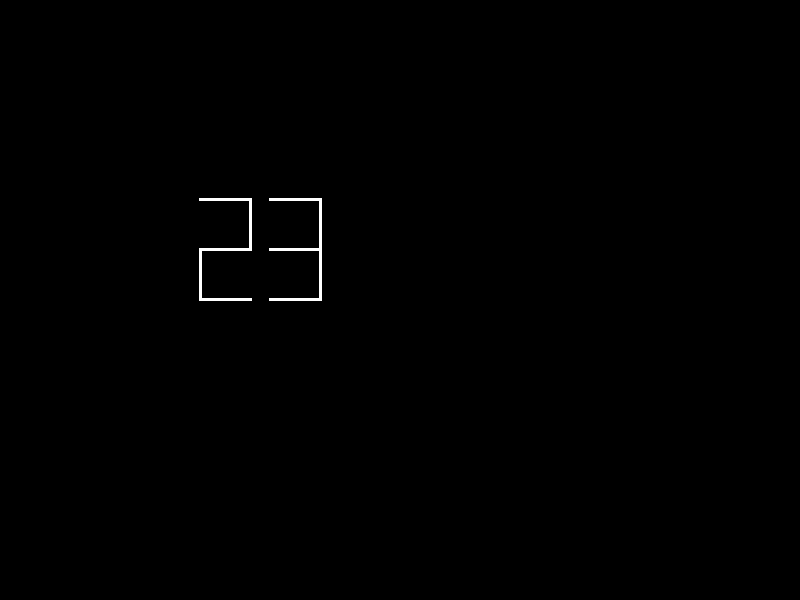

In [9]:
#from typing_extensions import ParamSpecKwargs
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

# Let's render something!
import random
def ownVertex(x,y):
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x,y,z)
def drawAxis():
  gl.glColor3f(0, 255, 0)
  gl.glPointSize(5)
  gl.glBegin(gl.GL_LINES)
  ownVertex(0,HEIGHT/2)
  ownVertex(0,-HEIGHT/2)
  ownVertex(WIDTH/2,0)
  ownVertex(-WIDTH/2,0)
  gl.glEnd()

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def pointDraw(cordinates_list):
  for item in cordinates_list:
    ordinate,abscissa = item
    ownVertex(ordinate,abscissa)

def midPointAlgo(f_cordinate,s_cordinate):
  cordinates= []
  x_1,y_1 = f_cordinate
  x_2,y_2 = s_cordinate
  dx = x_2 - x_1
  dy = y_2 - y_1
  d_init = 2*dy - dx
  d = d_init
  incrE, incrNE = 2 * dy,2 * (dy - dx)
  temp_x,temp_y = x_1,y_1
  while temp_x<=x_2:
    cordinates.append((temp_x,temp_y))
    # print(temp_x,temp_y)
    if d>=0: #NE
      d += incrNE
      temp_x += 1
      temp_y += 1
    elif d<0:
      d += incrE
      temp_x += 1
  return cordinates


def ZoneCovert(f_cordinate,s_cordinate):
  x_1,y_1 = f_cordinate
  x_2,y_2 = s_cordinate
  dx = x_2 - x_1
  dy = y_2 - y_1
  if abs(dx)>= abs(dy):
    if dx>=0 and dy>=0:
      #zone 0
      return f_cordinate,s_cordinate,0
    elif dx<=0 and dy>=0:
      #zone 3
      return (-x_1,y_1),(-x_2 ,y_2),3
    elif dx<=0 and dy<=0:
      #zone 4
      return (-x_1,-y_1),(-x_2 ,-y_2),4
    elif dx>=0 and dy<=0:
      #zone 7
      return (x_1,-y_1),(x_2 ,-y_2),7
  elif abs(dx)<= abs(dy):
    if dx>=0 and dy>=0:#zone1
      return (y_1,x_1),(y_2,x_2),1
    elif dx<=0 and dy>=0:#zone 2
      return (y_1,-x_1),(y_2,-x_2),2
    elif dx<=0 and dy<=0:
      #zone 5
      return (-y_1,-x_1),(-y_2,-x_2),5
    elif dx>=0 and dy<=0:
      #zone 6
      return (-y_1,x_1),(-y_2,x_2),6
def originalZone(cordinates,zone):
  new_cordinates = []
  if zone == 0:
    return cordinates
  elif zone == 1:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,x))
    return new_cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,x))
    return new_cordinates
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,y))
    return new_cordinates
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,-y))
    return new_cordinates
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,-x))
    return new_cordinates
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,-x))
    return new_cordinates
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_cordinates.append((x,-y))
    return new_cordinates

def Draw_point(p_1,p_2):
  cordinate_1,cordinate_2,zone = ZoneCovert(p_1,p_2)
  cordinates_list = midPointAlgo(cordinate_1,cordinate_2)
  original_cordinates_list=originalZone(cordinates_list,zone)

  colorChange(120,200,55)
  gl.glPointSize(3)
  gl.glBegin(gl.GL_POINTS)
  pointDraw(original_cordinates_list)
  gl.glEnd()

student_ID = input("Enter Your Id: ")
count = 0
for num in range(len(student_ID)-2,len(student_ID)):
  digit = int(student_ID[num])
  offset = count * 70
  a_x = -200 + offset
  b_x = -150 + offset
  b_y = 0
  c_y = 100
  d_y = 50
  if digit == 1:
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((b_x,d_y),(b_x,b_y)) #4
  elif digit == 2:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,b_y),(b_x,b_y)) #5
    Draw_point((a_x,b_y),(a_x,d_y)) #6
  elif digit == 3:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((b_x,d_y),(b_x,b_y)) #4
    Draw_point((a_x,b_y),(b_x,b_y)) #5
  elif digit == 4:
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
  elif digit == 5:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
    Draw_point((a_x,b_y),(b_x,b_y)) #5
  elif digit == 6:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
    Draw_point((a_x,b_y),(b_x,b_y)) #5
    Draw_point((a_x,b_y),(a_x,d_y)) #6
  elif digit == 7:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
  elif digit == 8:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
    Draw_point((a_x,b_y),(b_x,b_y)) #5
    Draw_point((a_x,b_y),(a_x,d_y)) #6
  elif digit == 9:
    Draw_point((a_x,c_y),(b_x,c_y)) #0
    Draw_point((b_x,c_y),(b_x,d_y)) #1
    Draw_point((a_x,d_y),(b_x,d_y)) #2
    Draw_point((a_x,c_y),(a_x,d_y)) #3
    Draw_point((b_x,d_y),(b_x,b_y)) #4
    Draw_point((a_x,b_y),(b_x,b_y)) #5
  count+=1










img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

Enter radius: 150
Enter origin: 20,20
150



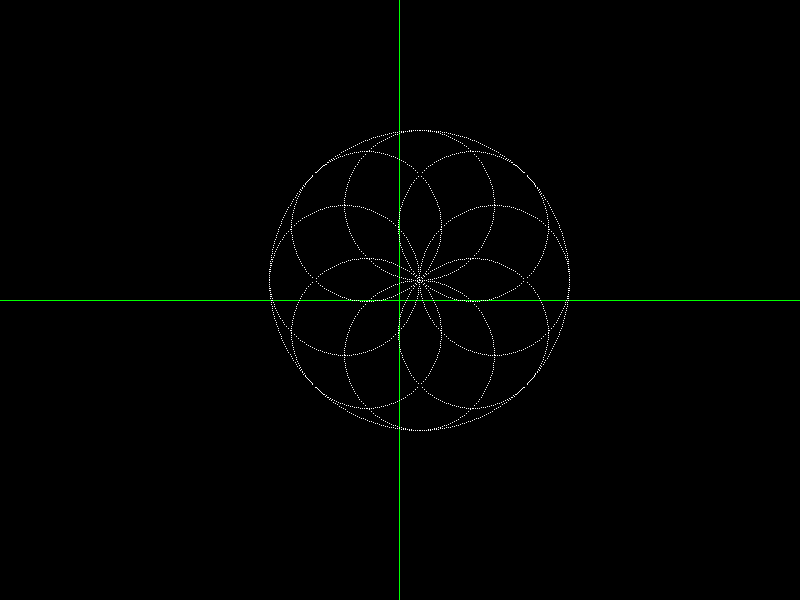

In [10]:
#from typing_extensions import ParamSpecKwargs
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

# Let's render something!
def ownVertex(x,y):
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x,y,z)
def drawAxis():
  gl.glColor3f(0, 255, 0)
  gl.glPointSize(5)
  gl.glBegin(gl.GL_LINES)
  ownVertex(0,HEIGHT/2)
  ownVertex(0,-HEIGHT/2)
  ownVertex(WIDTH/2,0)
  ownVertex(-WIDTH/2,0)
  gl.glEnd()

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def pointDraw(cordinates_list):
  gl.glColor3f(255, 255, 255)
  gl.glPointSize(2)
  gl.glBegin(gl.GL_LINES)
  for item in cordinates_list:
    ordinate,abscissa = item
    ownVertex(ordinate,abscissa)
  gl.glEnd()

def CircAtorigin(radius):
  d = 1-radius
  x = 0
  y = radius
  cordinates = []
  while x<=y:
    cordinates.append((x,y))
    if d>=0: #SE
      d += 2 * x - 2*y + 5
      x += 1
      y -= 1
    elif d<0:
      d += 2 * x + 5
      x += 1
  return cordinates


def InZone(cordinates,zone):
  new_cordinates = []
  if zone == 0:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,x))
  elif zone == 1:
    return cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,y))
    return new_cordinates
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,x))
    return new_cordinates
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,-x))
    return new_cordinates
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,-y))
    return new_cordinates
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_cordinates.append((x,-y))
    return new_cordinates
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,-x))
  return new_cordinates


def DrawAllZone(cordinates,h,k):
  for zone in range(8):
    toPrint=[]
    zone_points = InZone(cordinates,zone)
    pointDraw(changeOrigin(h,k,zone_points))
def changeOrigin(h,k,points):
  newPoints = []
  for point in points:
    x,y = point 
    x+= h
    y+=k
    newPoints.append((x,y))
  return newPoints




drawAxis()
radius = int(input("Enter radius: "))
origin = input("Enter origin: ")
origin = origin.split(",")
h = int(origin[0])
k = int(origin[1])
print(radius)
zone1_points=CircAtorigin(radius)
DrawAllZone(zone1_points,h,k)
x_draw = radius/2
x_n_draw = - x_draw
zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h+x_draw,k)

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h+x_n_draw,k)

y_draw = radius/2
y_n_draw = - y_draw

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h,y_draw+k)

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h,y_n_draw+k)



# zone1_points=CircAtorigin(radius/2)
# DrawAllZone(zone1_points,x_n_draw,y_n_draw)
# radius1 = radius 
#Corner Circle origin calculator 
#radius =radius ** 0.5
# y1 = ((((radius))**2 - (radius - h)**2)** 0.5)-k
# print(y1)
# common_point  = (radius,y1)
# Mid_point = ((h+radius)/2,(k+y1)/2)
# print(Mid_point)
# c_x,c_y = Mid_point
costheta = 0.7071067812
c_x,c_y = ((radius) * costheta)/2,((radius) * costheta)/2
zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,(h+c_x),k+c_y)

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,(-c_x+h),(k+c_y))

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h+c_x,(-c_y+k))



zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,-c_x+h,-c_y+k)



# 0



img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)